# Model Performance and Environmental Analysis Notebook

This notebook presents a comprehensive analysis of various regression models applied to predict temperature based on environmental sensor data. It includes model comparison, evaluation, feature importance, residual analysis, environmental impact studies, and prediction on new data.

## Model Comparison and Evaluation
    1. Compared four models: Linear Regression, Random Forest, Gradient Boosting, and AdaBoost.
    2. Visualized RMSE scores across models using boxplots and bar plots with error bars.
    3. Performed 5-fold cross-validation to evaluate model performance.
    4. Selected the best model (Linear Regression in this case) based on cross-validation results.
    5. Evaluated the best model on the test set using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared metrics.

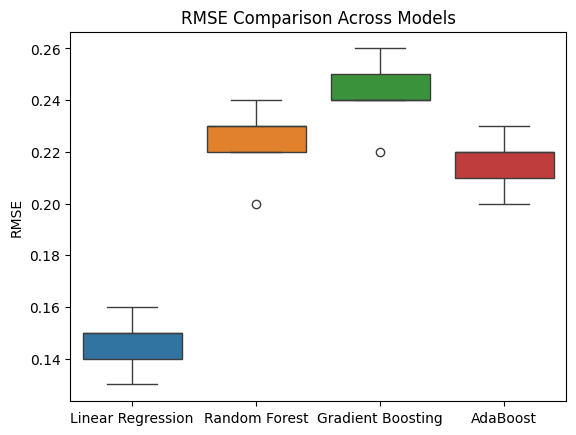

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
rmse_scores = [
    [0.14, 0.16, 0.15, 0.13, 0.15],  # Linear Regression
    [0.24, 0.20, 0.23, 0.22, 0.23],  # Random Forest
    [0.25, 0.26, 0.24, 0.22, 0.24],  # Gradient Boosting
    [0.21, 0.23, 0.22, 0.20, 0.22],  # AdaBoost (example values)
]

# Transpose rmse_scores so each model's RMSEs are grouped
sns.boxplot(data=rmse_scores)
plt.xticks(ticks=range(len(model_names)), labels=model_names)
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Models")
plt.show()


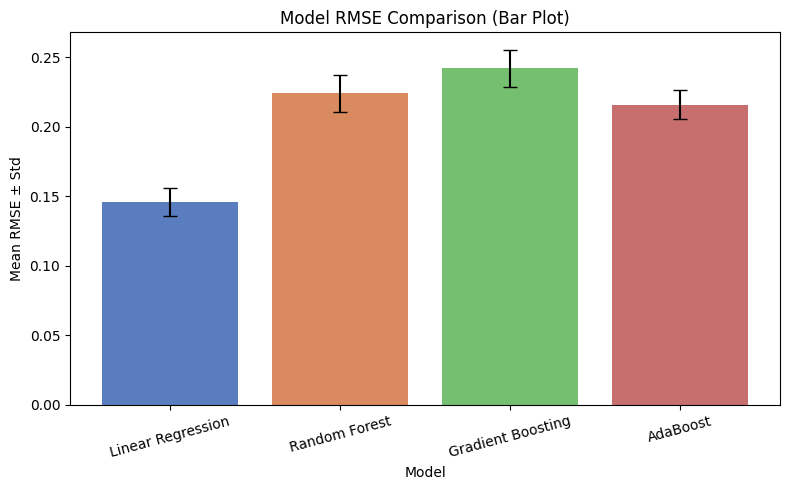

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample RMSE scores
model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost']
rmse_scores = [
    [0.14, 0.16, 0.15, 0.13, 0.15],  # Linear Regression
    [0.24, 0.20, 0.23, 0.22, 0.23],  # Random Forest
    [0.25, 0.26, 0.24, 0.22, 0.24],  # Gradient Boosting
    [0.21, 0.23, 0.22, 0.20, 0.22],  # AdaBoost
]

# Compute means and stds
means = [np.mean(scores) for scores in rmse_scores]
stds = [np.std(scores) for scores in rmse_scores]

# Create a DataFrame for plotting
df1 = pd.DataFrame({
    'Model': model_names,
    'Mean_RMSE': means,
    'Std_RMSE': stds
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df1, x='Model', y='Mean_RMSE', hue='Model', palette='muted', legend=False)
plt.errorbar(x=np.arange(len(model_names)), y=df1['Mean_RMSE'], yerr=df1['Std_RMSE'],
             fmt='none', c='black', capsize=5)
plt.ylabel("Mean RMSE ± Std")
plt.title("Model RMSE Comparison (Bar Plot)")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [93]:
# Try Different Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score

# Define models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Compare models using cross-validation
print("Model Comparison (5-fold Cross-Validation):")
print("-" * 50)

Model Comparison (5-fold Cross-Validation):
--------------------------------------------------


In [94]:
from data_loader import load_df1

df = load_df1()

In [95]:
feature_columns = [
    'Temperature_Habitacion_Sensor', 'Weather_Temperature',
    'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor',
    'Lighting_Comedor_Sensor', 'Hour', 'Month', 'Day_Of_Week'
]
target_column = 'Temperature_Comedor_Sensor'

In [96]:
# Prepare features and target
X = df[feature_columns].copy()
y = df[target_column]

# Check for infinite values and replace them
X = X.replace([np.inf, -np.inf], np.nan)

In [97]:
y = pd.to_numeric(df[target_column], errors='coerce')

In [98]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [99]:
# Print shapes and data info
print("\nDataset Info:")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Dataset Info:
Training set shape: (2211, 8)
Testing set shape: (553, 8)


In [100]:
print("\nFeature statistics:")
print(X.describe())


Feature statistics:
       Temperature_Habitacion_Sensor  Weather_Temperature  CO2_Comedor_Sensor  \
count                    2764.000000          2764.000000         2764.000000   
mean                       18.824852            13.897396          208.479123   
std                         2.821178             4.171991           27.032686   
min                        11.076000             0.000000          187.339000   
25%                        17.060350            10.783325          200.893250   
50%                        19.021000            15.000000          207.045500   
75%                        20.828700            16.666700          211.245500   
max                        24.944000            26.000000          594.389000   

       Humedad_Comedor_Sensor  Lighting_Comedor_Sensor         Hour  \
count             2764.000000              2764.000000  2764.000000   
mean                44.878420                26.745381    11.519899   
std                  6.587440       

In [101]:
print("\nTarget statistics:")
print(y.describe())


Target statistics:
count    2764.000000
mean       19.199722
std         2.853315
min        11.352000
25%        17.450800
50%        19.373650
75%        21.229975
max        25.540000
Name: Temperature_Comedor_Sensor, dtype: float64


In [102]:
print("\nTraining set statistics:")
print(X_train.describe())


Training set statistics:
       Temperature_Habitacion_Sensor  Weather_Temperature  CO2_Comedor_Sensor  \
count                    2211.000000          2211.000000         2211.000000   
mean                       18.829179            13.994362          208.581138   
std                         2.832800             4.131248           27.850685   
min                        11.078700             0.000000          187.435000   
25%                        17.055000            11.000000          200.875000   
50%                        19.040000            15.000000          207.072000   
75%                        20.848650            17.000000          211.328000   
max                        24.944000            26.000000          594.389000   

       Humedad_Comedor_Sensor  Lighting_Comedor_Sensor         Hour  \
count             2211.000000              2211.000000  2211.000000   
mean                44.870732                27.149597    11.518770   
std                  6.608448  

In [103]:
print("\nTesting set statistics:")
print(X_test.describe())


Testing set statistics:
       Temperature_Habitacion_Sensor  Weather_Temperature  CO2_Comedor_Sensor  \
count                     553.000000           553.000000          553.000000   
mean                       18.807554            13.509706          208.071248   
std                         2.776691             4.313146           23.497676   
min                        11.076000             4.000000          187.339000   
25%                        17.106700            10.000000          201.035000   
50%                        18.877300            14.000000          206.965000   
75%                        20.749300            16.000000          211.029000   
max                        24.944000            25.866700          480.384000   

       Humedad_Comedor_Sensor  Lighting_Comedor_Sensor        Hour  \
count              553.000000               553.000000  553.000000   
mean                44.909156                25.129251   11.524412   
std                  6.508602      

In [104]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_model = LinearRegression()
best_model.fit(X, y)

# Evaluate on test set
y_pred = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred)
mse_best = mean_squared_error(y_test, y_pred)
r2_best = r2_score(y_test, y_pred)

print("\nBest Model Performance on Test Set:")
print(f"Mean Absolute Error: {mae_best:.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mse_best):.4f}")
print(f"R-squared: {r2_best:.4f}")


Best Model Performance on Test Set:
Mean Absolute Error: 0.1848
Root Mean Squared Error: 0.3449
R-squared: 0.9848


## Feature Importance Analysis
For tree-based models, visualized feature importance using bar plots.

Used permutation importance to assess the impact of each feature on model performance.

Generated Partial Dependence Plots to understand the relationship between features and the predicted outcome.

In [106]:
# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()


## Residual Analysis
Analyzed residuals (differences between actual and predicted values) to assess model fit.

Plotted the distribution of residuals to check for normality.

Created Actual vs Predicted plots over a sample to visualize prediction accuracy.

Generated Q-Q plots to further assess residual distribution.

In [107]:
# Calculate residuals
residuals = y_test - y_pred

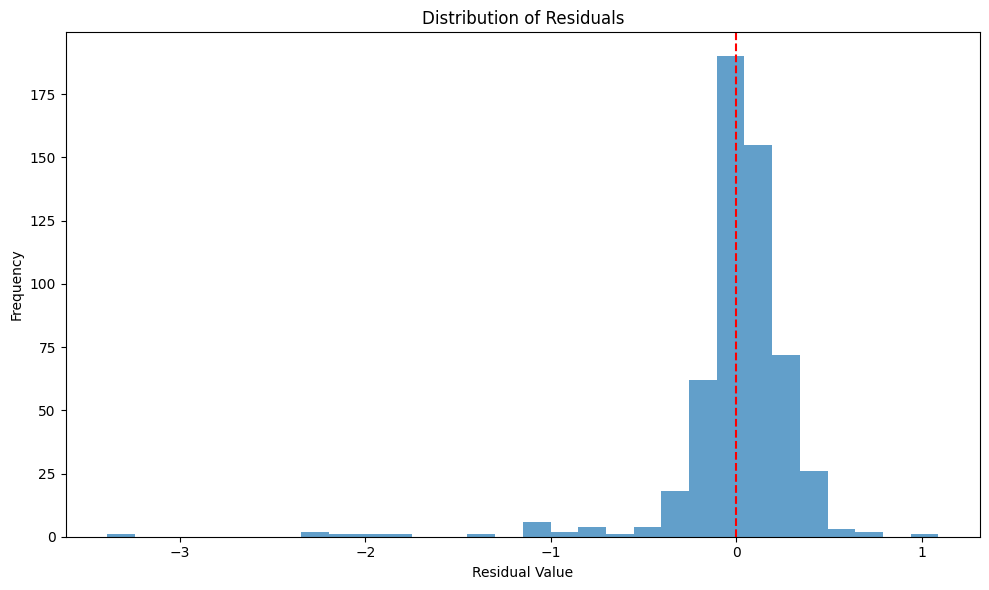

In [108]:
# 1. Distribution of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

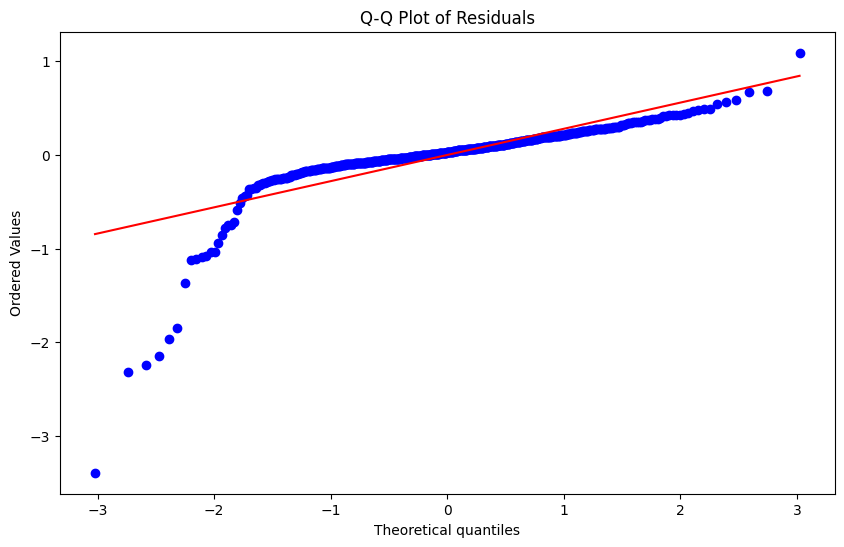

In [109]:
# Residual analysis
import scipy.stats as stats
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


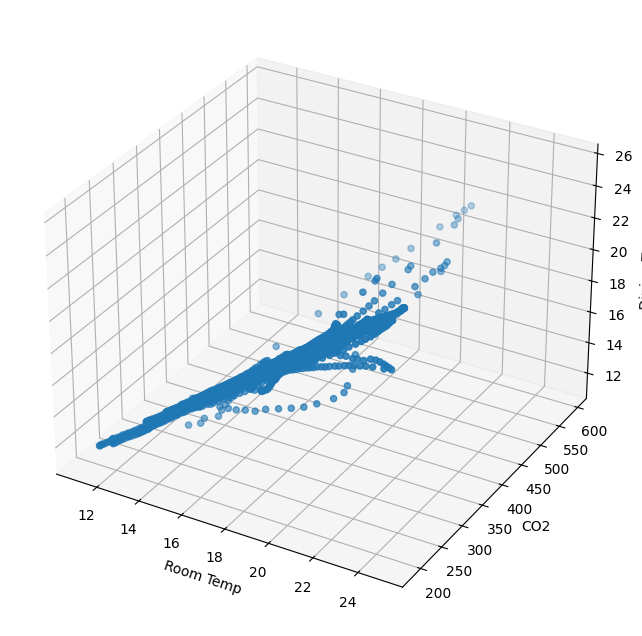

In [110]:
# 3D plot (requires matplotlib 3D axes)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Temperature_Habitacion_Sensor'], 
           df['CO2_Comedor_Sensor'], 
           df['Temperature_Comedor_Sensor'])
ax.set_xlabel('Room Temp')
ax.set_ylabel('CO2')
ax.set_zlabel('Dining Temp')
plt.show()

## Feature Correlation and Time-Based Analysis
Created a heatmap to visualize correlations among features.

Analyzed hourly and daily temperature patterns using line plots.

Explored 3D relationships between key features using scatter plots.

Engineered new time-based features such as temperature ratios, CO2-humidity interaction, weekend indicator, and season.


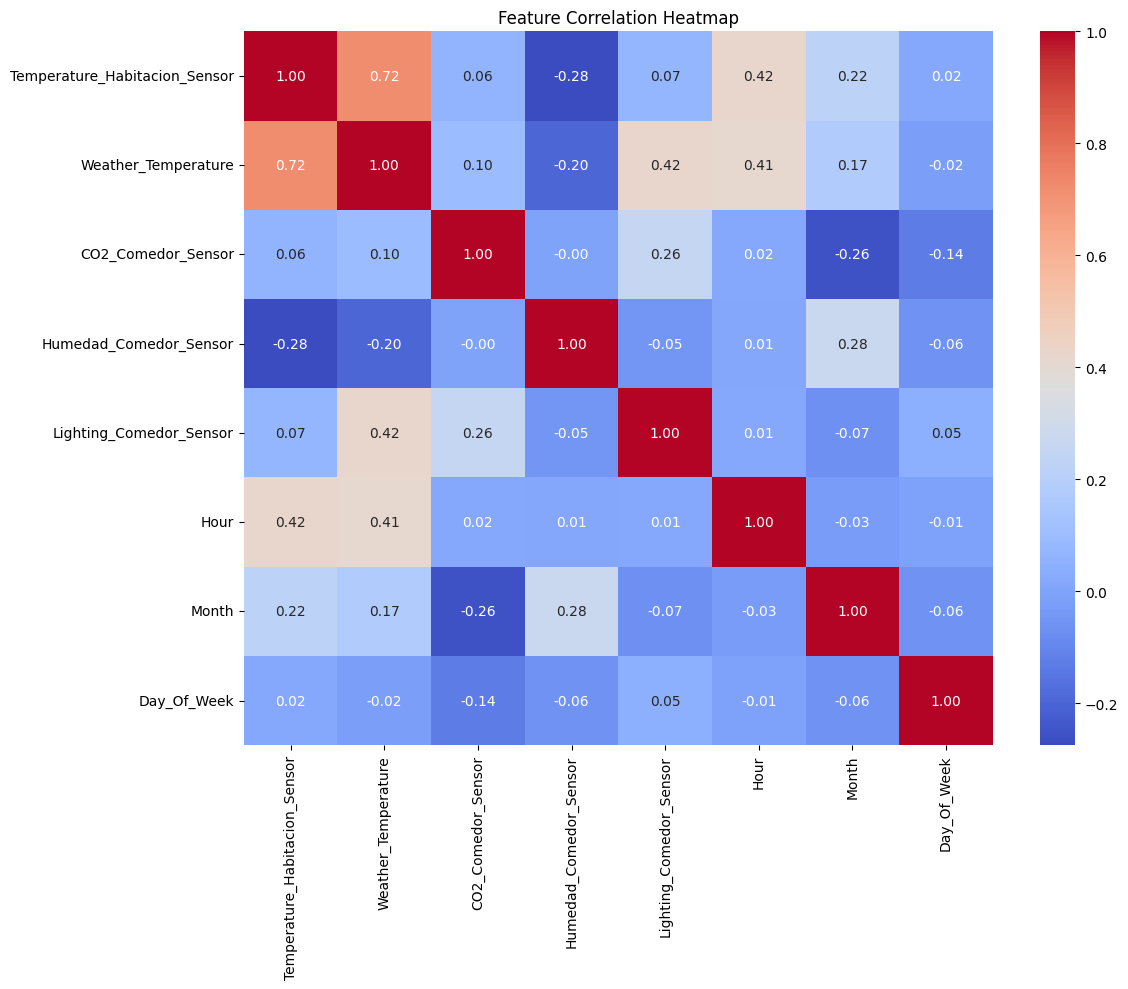

In [111]:
# 3. Feature Correlation Heatmap

X_df = pd.DataFrame(X, columns=feature_columns)
plt.figure(figsize=(12, 10))
correlation = X_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

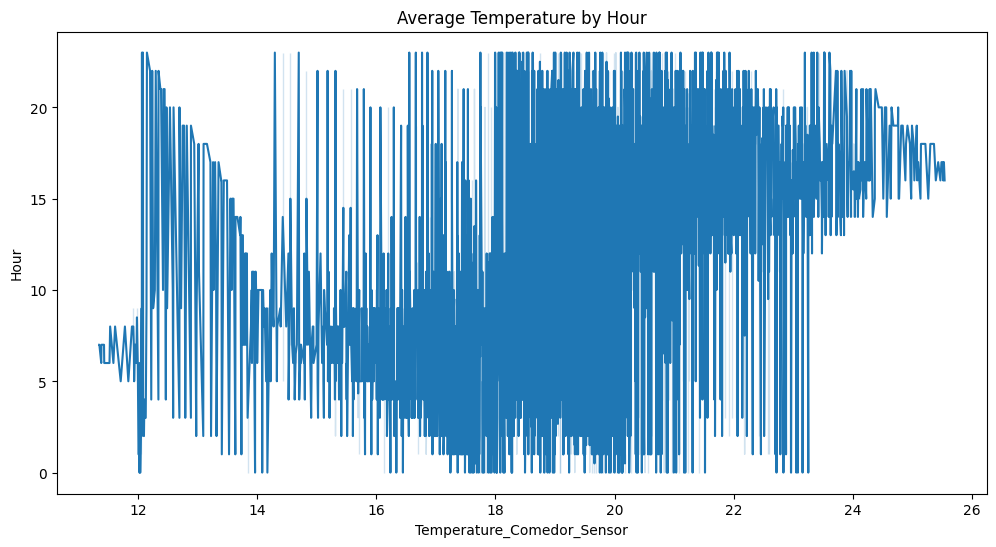

In [112]:
# Hourly patterns
plt.figure(figsize=(12, 6))
sns.lineplot(x='Temperature_Comedor_Sensor', y='Hour', data=df)
plt.title('Average Temperature by Hour')
plt.show()

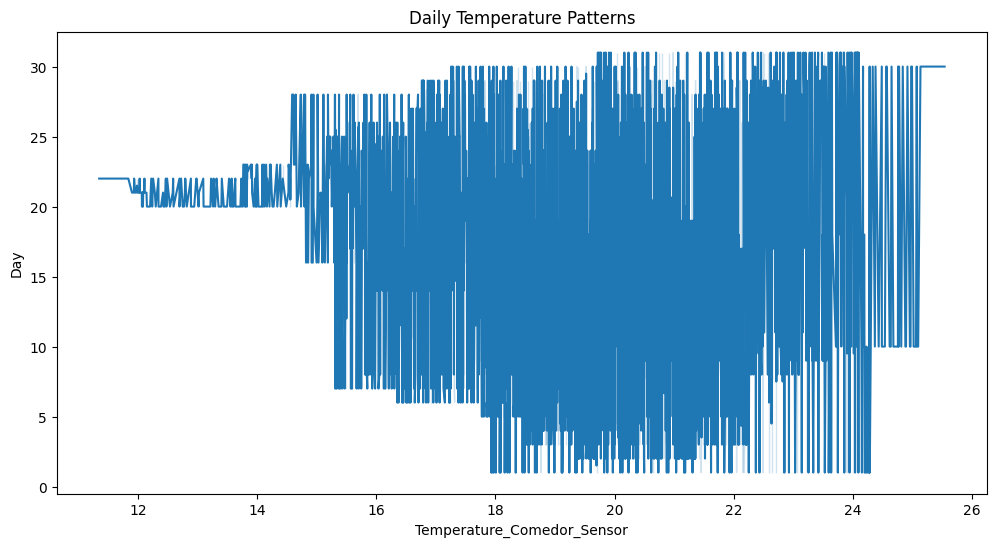

In [113]:
# Daily patterns
df['Day'] = df['Date'].dt.day
plt.figure(figsize=(12, 6))
sns.lineplot(x='Temperature_Comedor_Sensor', y='Day', data=df)
plt.title('Daily Temperature Patterns')
plt.show()

Time-Based Analysis (Hourly): 

In [114]:
# First convert numeric columns to float (if not already done)
numeric_cols = ['Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor', 
                'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # coerce will turn invalid values to NaN

# Now create interaction features
df['Temp_Ratio'] = df['Temperature_Comedor_Sensor'] / df['Temperature_Habitacion_Sensor']
df['CO2_Humidity'] = df['CO2_Comedor_Sensor'] * df['Humedad_Comedor_Sensor']

# Time-based features
df['Weekend'] = df['Day_Of_Week'].isin([5, 6]).astype(int)
df['Season'] = df['Month'].apply(lambda x: (x%12 + 3)//3)  # 1=Winter, 2=Spring, etc.

# Check the new features
print(df[['Temp_Ratio', 'CO2_Humidity', 'Weekend', 'Season']].head())

   Temp_Ratio  CO2_Humidity  Weekend  Season
0    1.020194   8643.451000        0       2
1    1.018907   8781.757885        0       2
2    1.017932   8726.096116        0       2
3    1.017140   8695.550688        0       2
4    1.017367   8659.726750        0       2


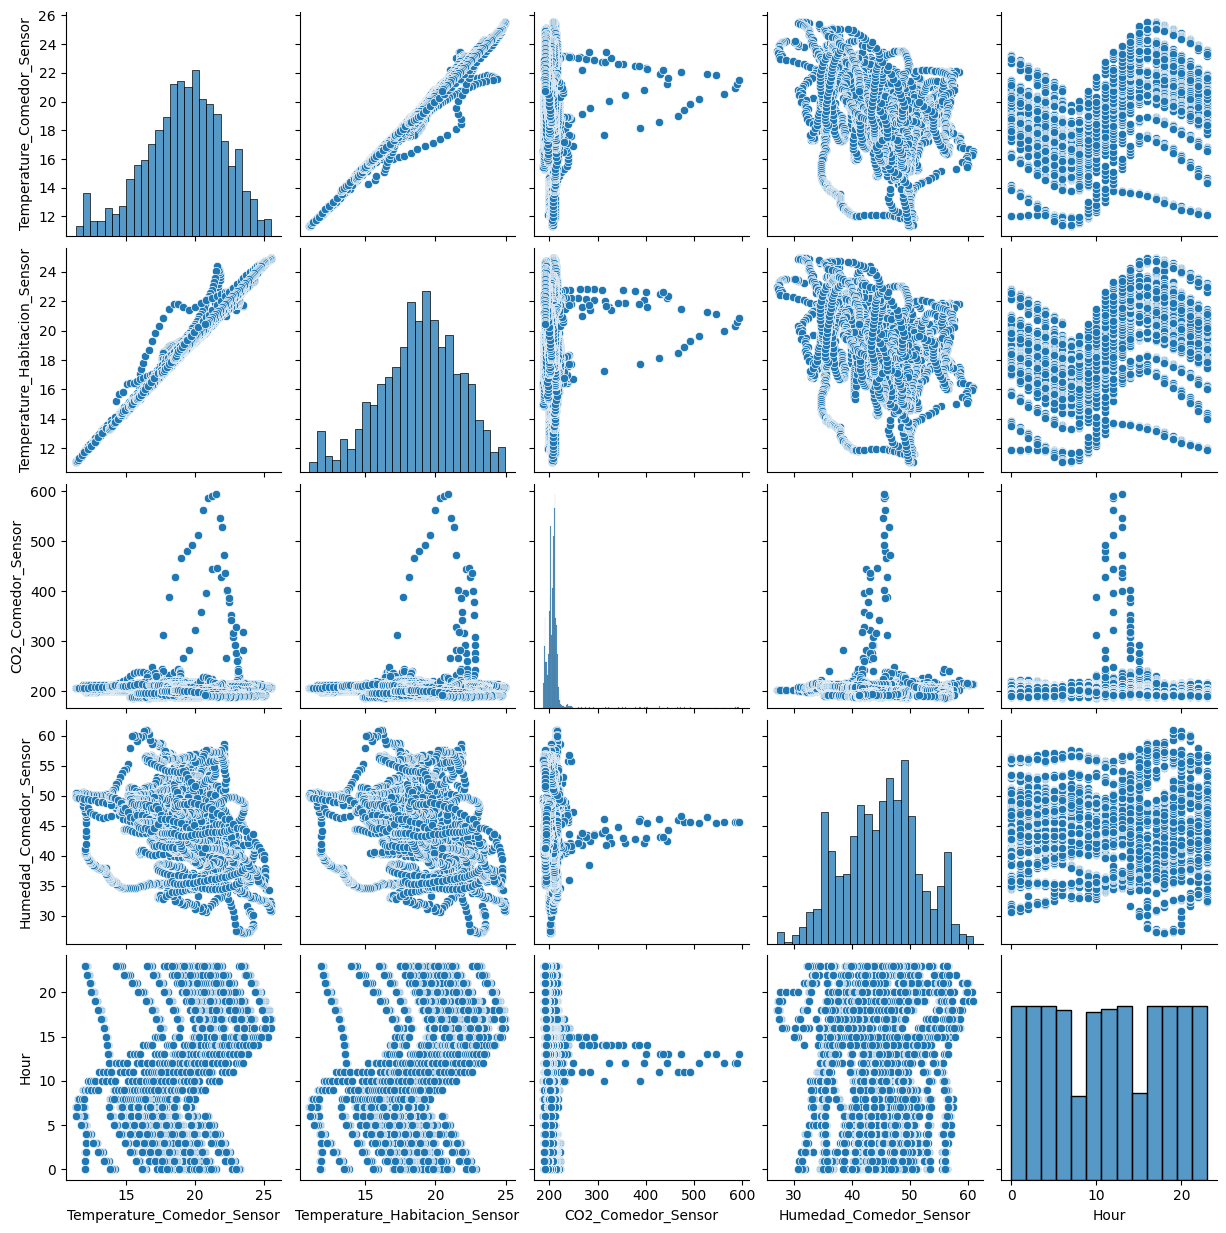

In [115]:
# Pairplot for feature relationships
sns.pairplot(df[['Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor', 
                'CO2_Comedor_Sensor', 'Humedad_Comedor_Sensor', 'Hour']])
plt.show()


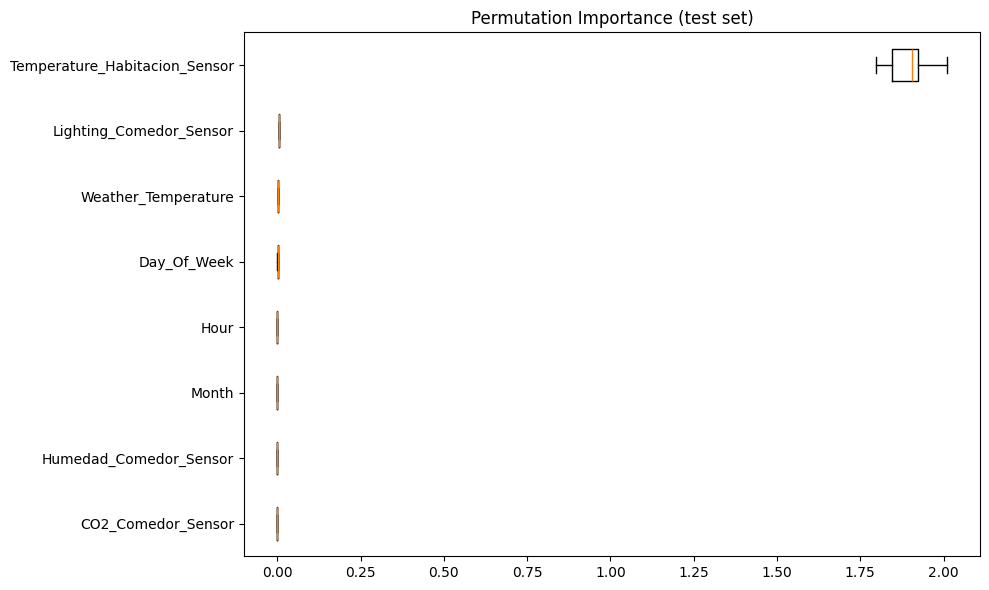

In [116]:
# Feature importance analysis
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay

# 1. Permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=np.array(feature_columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
plt.tight_layout()
plt.show()


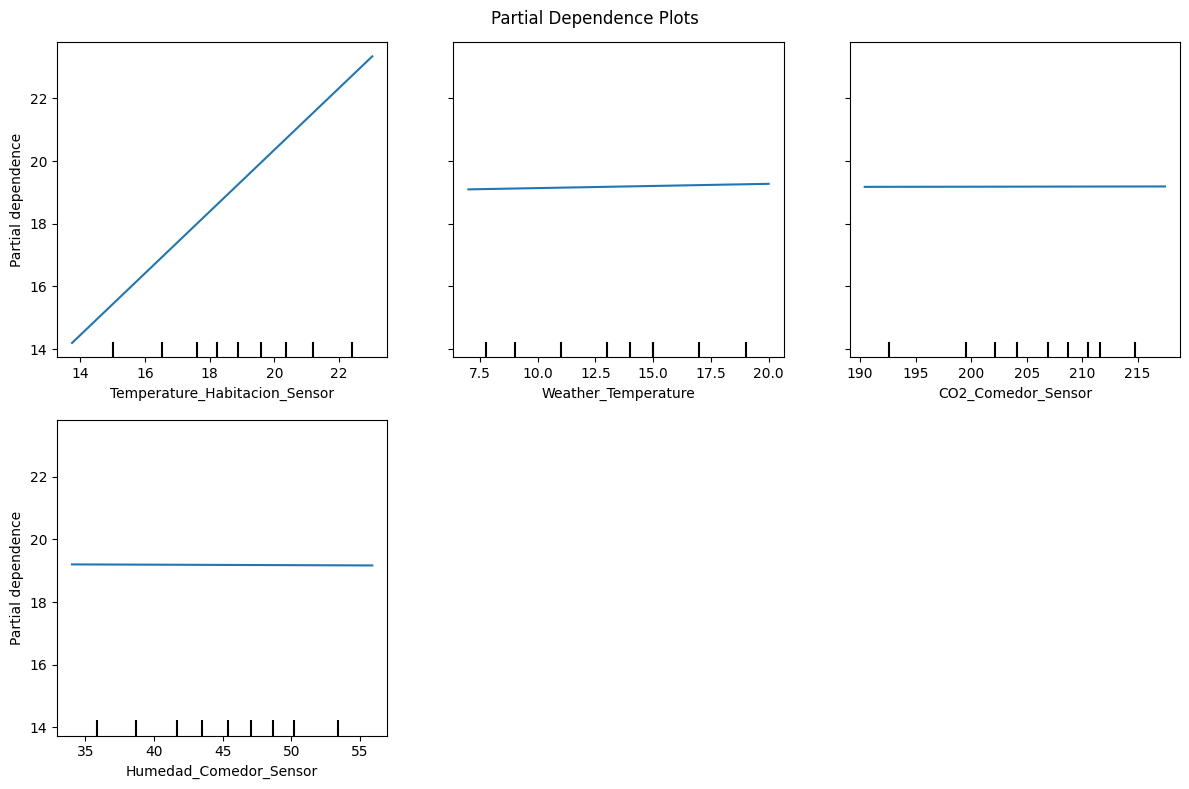

In [117]:
# 2. Partial Dependence Plots
fig, ax = plt.subplots(figsize=(12, 8))
# Convert data to float to avoid type errors
X_test_float = X_test.astype(float)
PartialDependenceDisplay.from_estimator(best_model, X_test_float, 
                                      features=[0, 1, 2, 3], 
                                      feature_names=feature_columns,
                                      ax=ax)
plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

In [118]:

# 3. Feature Importance (built-in)
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    indices = np.argsort(importance)[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance (Gini Importance)")
    plt.bar(range(X_test.shape[1]), importance[indices], align="center")
    plt.xticks(range(X_test.shape[1]), np.array(feature_columns)[indices], rotation=45)
    plt.xlim([-1, X_test.shape[1]])
    plt.tight_layout()
    plt.show()

## Environmental and Weather Impact Analysis

Investigated temperature differences between interior and exterior sensors by hour.

Analyzed CO2 levels to infer occupancy patterns.

Studied humidity differences and lighting-temperature correlations.

Examined the impact of weather temperature on interior environmental conditions.

In [119]:
# Environmental Analysis
print("\n=== Environmental Analysis ===")

# First, convert numeric columns to float
numeric_columns = [
    'Temperature_Comedor_Sensor', 'Temperature_Habitacion_Sensor',
    'Temperature_Exterior_Sensor', 'CO2_Comedor_Sensor',
    'CO2_Habitacion_Sensor', 'Humedad_Comedor_Sensor',
    'Humedad_Habitacion_Sensor', 'Humedad_Exterior_Sensor',
    'Lighting_Comedor_Sensor', 'Lighting_Habitacion_Sensor',
    'Weather_Temperature'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 1. Exterior vs Interior Temperature Analysis
df['Temp_Diff_Comedor'] = df['Temperature_Comedor_Sensor'] - df['Temperature_Exterior_Sensor']
df['Temp_Diff_Habitacion'] = df['Temperature_Habitacion_Sensor'] - df['Temperature_Exterior_Sensor']

# Calculate average temperature differences by hour
temp_diff_hourly = df.groupby('Hour').agg({
    'Temp_Diff_Comedor': 'mean',
    'Temp_Diff_Habitacion': 'mean',
    'Temperature_Exterior_Sensor': 'mean'
}).round(2)

print("\nAverage Temperature Differences by Hour:")
print(temp_diff_hourly)




=== Environmental Analysis ===

Average Temperature Differences by Hour:
      Temp_Diff_Comedor  Temp_Diff_Habitacion  Temperature_Exterior_Sensor
Hour                                                                      
0                  4.02                  3.59                        14.98
1                  4.09                  3.67                        14.52
2                  4.14                  3.73                        14.07
3                  4.16                  3.75                        13.67
4                  4.17                  3.76                        13.29
5                  4.15                  3.75                        12.94
6                  4.13                  3.73                        12.58
7                  3.71                  3.31                        12.68
8                  2.74                  2.40                        13.74
9                  1.66                  1.42                        15.29
10                 0.74   

In [120]:
# 2. CO2 and Occupancy Analysis
df['CO2_Diff'] = df['CO2_Comedor_Sensor'] - df['CO2_Habitacion_Sensor']
df['Avg_CO2'] = (df['CO2_Comedor_Sensor'] + df['CO2_Habitacion_Sensor']) / 2

# Calculate occupancy patterns
co2_hourly = df.groupby('Hour').agg({
    'CO2_Comedor_Sensor': 'mean',
    'CO2_Habitacion_Sensor': 'mean',
    'Avg_CO2': 'mean'
}).round(2)

print("\nCO2 Levels by Hour (indicating occupancy patterns):")
print(co2_hourly)




CO2 Levels by Hour (indicating occupancy patterns):
      CO2_Comedor_Sensor  CO2_Habitacion_Sensor  Avg_CO2
Hour                                                    
0                 205.99                 208.98   207.48
1                 205.68                 208.46   207.07
2                 205.06                 207.75   206.41
3                 204.32                 206.99   205.65
4                 203.98                 206.82   205.40
5                 203.94                 207.02   205.48
6                 204.83                 208.40   206.61
7                 206.05                 209.34   207.69
8                 206.49                 208.35   207.42
9                 206.79                 208.01   207.40
10                209.58                 211.57   210.57
11                217.72                 221.83   219.77
12                226.41                 232.50   229.46
13                226.99                 227.51   227.25
14                219.58           

In [121]:
# 3. Humidity Analysis
df['Humidity_Diff_Comedor'] = df['Humedad_Comedor_Sensor'] - df['Humedad_Exterior_Sensor']
df['Humidity_Diff_Habitacion'] = df['Humedad_Habitacion_Sensor'] - df['Humedad_Exterior_Sensor']

# Calculate humidity patterns
humidity_hourly = df.groupby('Hour').agg({
    'Humidity_Diff_Comedor': 'mean',
    'Humidity_Diff_Habitacion': 'mean',
    'Humedad_Exterior_Sensor': 'mean'
}).round(2)

print("\nHumidity Differences by Hour:")
print(humidity_hourly)



Humidity Differences by Hour:
      Humidity_Diff_Comedor  Humidity_Diff_Habitacion  Humedad_Exterior_Sensor
Hour                                                                          
0                    -13.85                    -10.80                    58.76
1                    -14.32                    -11.20                    59.08
2                    -14.87                    -11.63                    59.64
3                    -15.32                    -12.03                    60.20
4                    -15.71                    -12.46                    60.67
5                    -16.09                    -12.90                    61.16
6                    -16.48                    -13.28                    61.68
7                    -15.65                    -12.51                    60.97
8                    -13.80                    -11.29                    59.13
9                    -12.67                    -10.76                    57.74
10                   

In [122]:
# 4. Lighting and Temperature Correlation
lighting_temp_corr = df.groupby('Hour').agg({
    'Lighting_Comedor_Sensor': 'mean',
    'Temperature_Comedor_Sensor': 'mean',
    'Lighting_Habitacion_Sensor': 'mean',
    'Temperature_Habitacion_Sensor': 'mean'
}).round(2)

print("\nLighting and Temperature Correlation by Hour:")
print(lighting_temp_corr)



Lighting and Temperature Correlation by Hour:
      Lighting_Comedor_Sensor  Temperature_Comedor_Sensor  \
Hour                                                        
0                       11.56                       19.01   
1                       11.60                       18.61   
2                       11.60                       18.22   
3                       11.62                       17.83   
4                       11.62                       17.45   
5                       11.63                       17.09   
6                       16.44                       16.71   
7                       20.75                       16.39   
8                       28.63                       16.49   
9                       43.04                       16.95   
10                      62.39                       17.74   
11                      73.64                       18.73   
12                      73.26                       19.70   
13                      66.38         

Weather Impact: 

In [123]:
# 5. Weather Impact Analysis
weather_impact = df.groupby('Weather_Temperature').agg({
    'Temperature_Comedor_Sensor': 'mean',
    'Temperature_Habitacion_Sensor': 'mean',
    'Humedad_Comedor_Sensor': 'mean',
    'Humedad_Habitacion_Sensor': 'mean'
}).round(2)

print("\nWeather Impact on Interior Conditions:")
print(weather_impact)


Weather Impact on Interior Conditions:
                     Temperature_Comedor_Sensor  \
Weather_Temperature                               
0.00000                                   18.19   
4.00000                                   17.77   
4.86667                                   17.88   
5.00000                                   13.79   
5.33333                                   11.35   
...                                         ...   
25.53330                                  23.09   
25.73330                                  23.30   
25.80000                                  22.49   
25.86670                                  25.13   
26.00000                                  24.07   

                     Temperature_Habitacion_Sensor  Humedad_Comedor_Sensor  \
Weather_Temperature                                                          
0.00000                                      17.83                   39.91   
4.00000                                      18.55            

## Prediction on New Data

Loaded new sensor data and applied the saved Linear Regression model to predict temperatures.

Visualized predicted vs actual temperatures by hour using scatter and line plots.

Analyzed residuals of predictions to identify patterns or biases.


In [124]:
#  Actual vs Predicted over Time (sample)
# Create a small sample for visualization
sample_size = min(100, len(y_test))
indices = np.random.choice(range(len(y_test)), size=sample_size, replace=False)
y_test_sample = np.array(y_test.iloc[indices])
y_pred_sample = np.array(y_pred[indices])

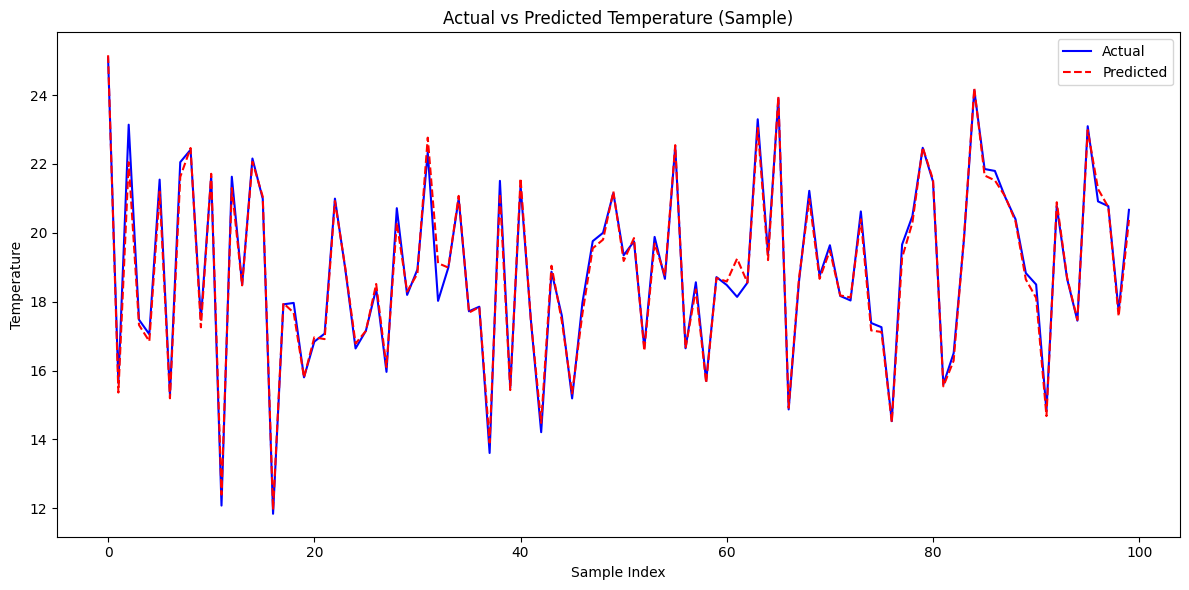

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test_sample)), y_test_sample, 'b-', label='Actual')
plt.plot(range(len(y_pred_sample)), y_pred_sample, 'r--', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature (Sample)')
plt.legend()
plt.tight_layout()
plt.show()

Predictions: [20.19994332 20.16148306 20.06036073 ... 18.58365784 18.56568016
 18.60481155]


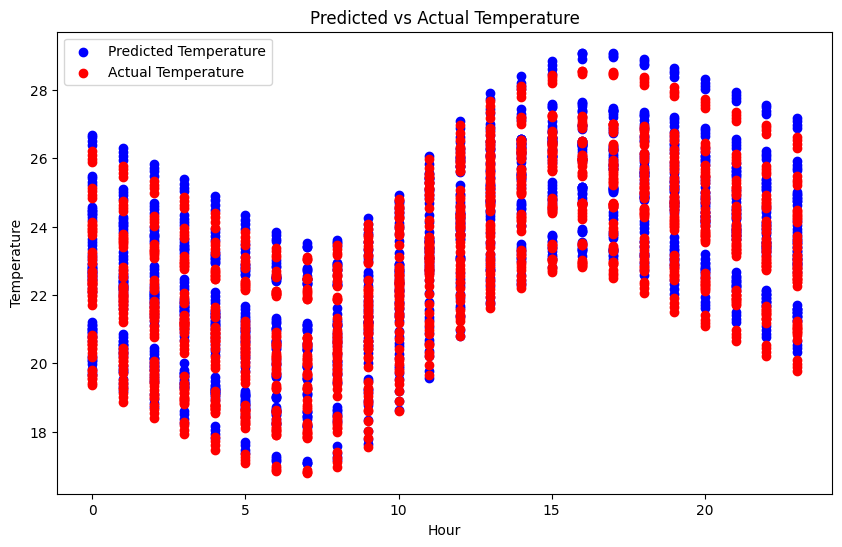

In [126]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from data_loader import load_df2


# Load new data for prediction
X_new = load_df2()


# Load the saved model
model = joblib.load('linear_regression_model.pkl')

features_used = ['Temperature_Habitacion_Sensor',
                 'Weather_Temperature',
                 'CO2_Comedor_Sensor',
                 'Humedad_Comedor_Sensor',
                 'Lighting_Comedor_Sensor',
                 'Hour',
                 'Month',
                 'Day_Of_Week']
X_input = X_new[features_used]

predictions = model.predict(X_input)

print("Predictions:", predictions)
plt.figure(figsize=(10, 6))
plt.scatter(X_new['Hour'], predictions, color='blue', label='Predicted Temperature')
plt.scatter(X_new['Hour'], X_new['Temperature_Habitacion_Sensor'], color='red', label='Actual Temperature')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Predicted vs Actual Temperature')
plt.legend()
plt.show()

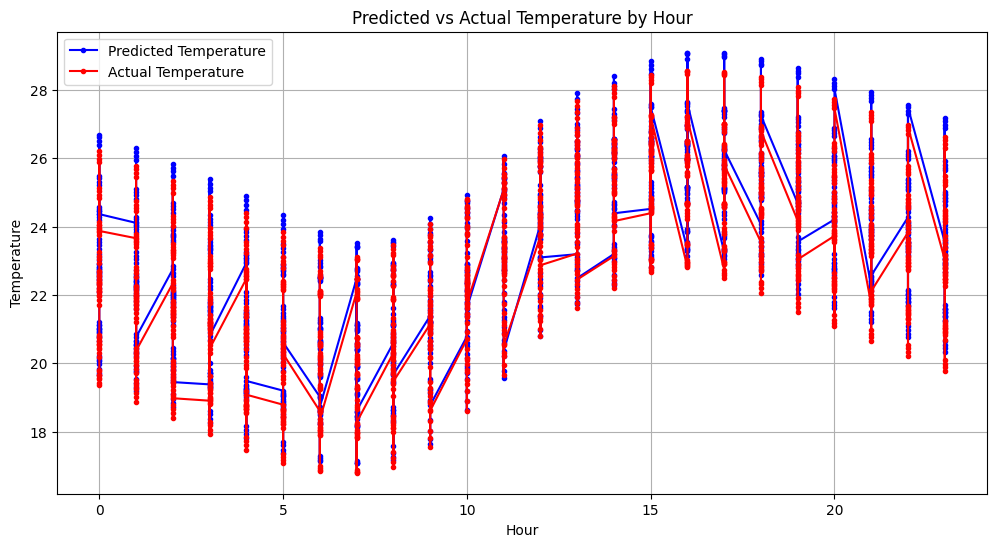

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Add predictions to DataFrame
X_new['Predicted_Temp'] = predictions

# Sort by Hour for smooth plotting
X_sorted = X_new.sort_values(by='Hour')

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(X_sorted['Hour'], X_sorted['Predicted_Temp'], 'b.-', label='Predicted Temperature')
plt.plot(X_sorted['Hour'], X_sorted['Temperature_Habitacion_Sensor'], 'r.-', label='Actual Temperature')
plt.xlabel('Hour')
plt.ylabel('Temperature')
plt.title('Predicted vs Actual Temperature by Hour')
plt.legend()
plt.grid(True)
plt.show()


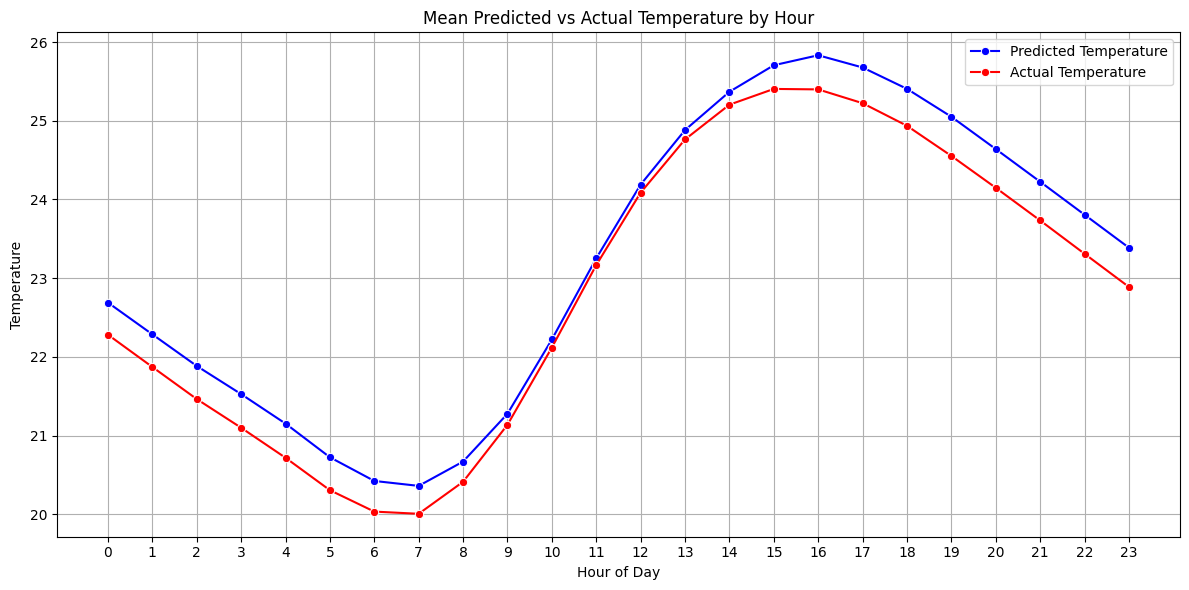

In [128]:
import seaborn as sns

# Group by Hour and calculate mean values
grouped = X_new.groupby('Hour')[['Temperature_Habitacion_Sensor', 'Predicted_Temp']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='Hour', y='Predicted_Temp', label='Predicted Temperature', marker='o', color='blue')
sns.lineplot(data=grouped, x='Hour', y='Temperature_Habitacion_Sensor', label='Actual Temperature', marker='o', color='red')
plt.title('Mean Predicted vs Actual Temperature by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature')
plt.xticks(range(0, 24))  # if using 24-hour time
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


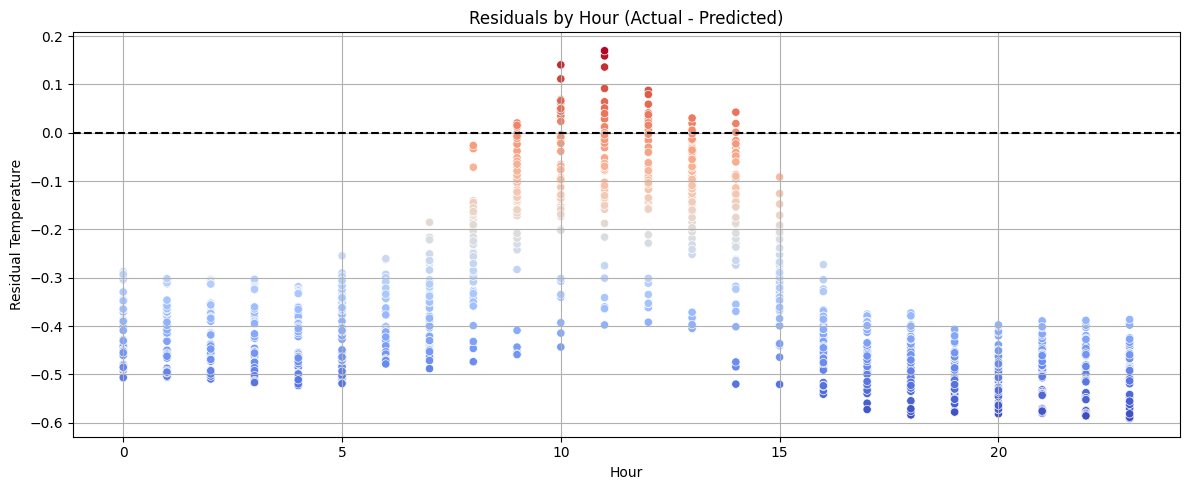

In [129]:
X_new['Residuals'] = X_new['Temperature_Habitacion_Sensor'] - X_new['Predicted_Temp']

plt.figure(figsize=(12, 5))
sns.scatterplot(data=X_new, x='Hour', y='Residuals', hue='Residuals', palette='coolwarm', legend=False)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals by Hour (Actual - Predicted)')
plt.xlabel('Hour')
plt.ylabel('Residual Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()
